In [20]:
import pandas as pd
from sklearn import * 
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

from mlxtend.plotting import plot_decision_regions

%matplotlib inline

In [4]:
df = pd.read_csv("/data/iris.csv")

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
df.Species.value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
features = ["SepalLengthCm", "PetalLengthCm"]

In [9]:
features[0], features[1]

('SepalLengthCm', 'PetalLengthCm')

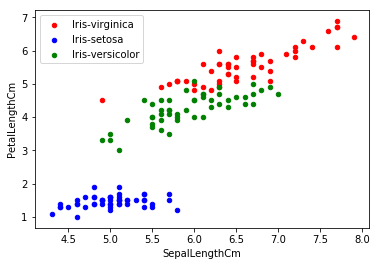

In [18]:
_, ax = plt.subplots()
df[df.Species == "Iris-virginica"].plot.scatter(features[0], features[1], color = "red", ax = ax, label = "Iris-virginica")
df[df.Species == "Iris-setosa"].plot.scatter(features[0], features[1], color = "blue", ax = ax, label = "Iris-setosa")
df[df.Species == "Iris-versicolor"].plot.scatter(features[0], features[1], color = "green", ax = ax, label = "Iris-versicolor")
plt.legend()

Test acc:  0.9777777777777777


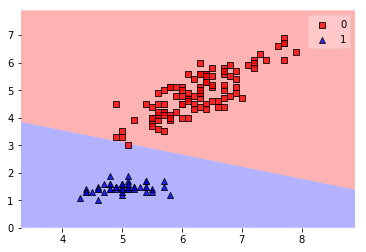

In [22]:

y = np.where(df.Species == "Iris-setosa", 1, 0)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C=1.0)) 
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Test acc: ", pipe.score(X_test, y_test))

plot_decision_regions(X.values, y, pipe)

Test acc:  0.9777777777777777


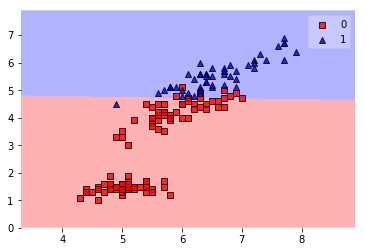

In [23]:

y = np.where(df.Species == "Iris-virginica", 1, 0)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C=1.0)) 
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Test acc: ", pipe.score(X_test, y_test))

plot_decision_regions(X.values, y, pipe)

Test acc:  0.6


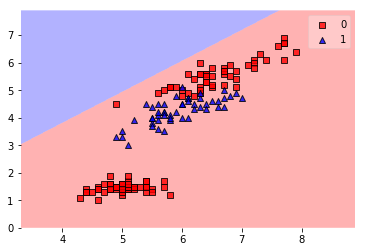

In [24]:

y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C=1.0)) 
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Test acc: ", pipe.score(X_test, y_test))

plot_decision_regions(X.values, y, pipe)

In [26]:
pd.Series(y).value_counts()/len(y)

0    0.666667
1    0.333333
dtype: float64

Test acc:  0.9555555555555556


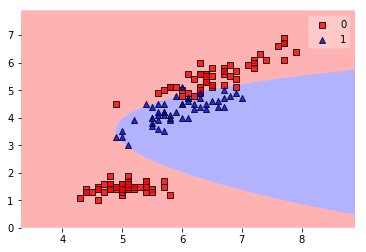

In [38]:

y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=4, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression(C=1.0)) 
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Test acc: ", pipe.score(X_test, y_test))

plot_decision_regions(X.values, y, pipe)

In [39]:
pipe.steps[-1][-1].coef_

array([[ 0.44416688,  2.37778272,  0.25059774,  1.34149708,  0.29590747,
         0.08158578,  0.61114209, -0.26839284, -1.31225577, -0.05749491,
         0.11176089, -0.6467129 , -1.50533352, -2.25079291]])

Test acc:  0.9777777777777777


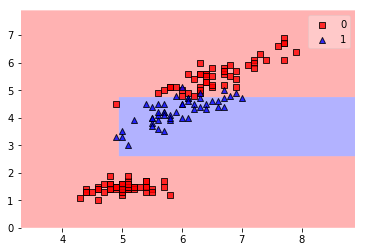

In [31]:

y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", tree.DecisionTreeClassifier(max_depth=3)) 
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Test acc: ", pipe.score(X_test, y_test))

plot_decision_regions(X.values, y, pipe)

Test acc:  0.9777777777777777


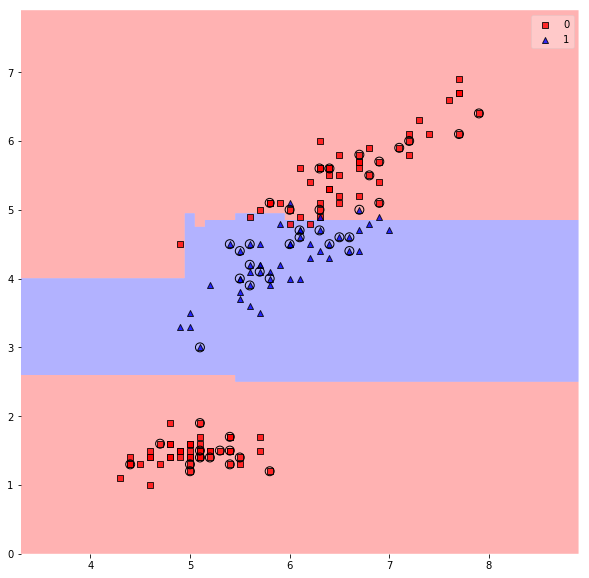

In [35]:

y = np.where(df.Species == "Iris-versicolor", 1, 0)
X = df[features]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                                , test_size = 0.3, random_state = 1)

pipe = pipeline.Pipeline([
    ("poly", preprocessing.PolynomialFeatures(degree=1, include_bias=False)),
    ("scaler", preprocessing.StandardScaler()),
    ("est", ensemble.RandomForestClassifier(max_depth=3, random_state=1)) 
])


plt.figure(figsize=(10, 10))
pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)
print("Test acc: ", pipe.score(X_test, y_test))

plot_decision_regions(X.values, y, pipe, X_highlight=X_test.values)